In [84]:
import sympy as sp 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import thesis_rcparams

## Martos Halo Tidal Tensor: 

This was a fun exercise. Take the Martos halo:

$$ M_\text{enc}(r) = M_0\frac{(r/r_s)^\gamma}{1+(r/r_s)^{\gamma-1}}$$ 

which can be dedimensionalized by the following subs: $s=r/r_s$ and $M'=M/M_0$

$$ M'_\text{enc}(s) =\frac{s^\gamma}{1+s^{\gamma-1}}$$ 

Which is already de-dimensionalized. I can compute the force at any point by taking advantage of spherical symmetry:

$$ F = -\frac{GM_\text{enc}(r)}{r^3}\vec{r}$$

I want to de-dimensionalize this force given that $s=r/r_s$ where $r_s$ is the halo's characteristic length. It follows that $s^2 = x'^2+y'^2+z'^2$. I can now rewrite the dedimensionalized force as: 

$$ F' =-\frac{M'_\text{enc}(s)}{s^3}\vec{s}$$

And it is related to the full force as: $ F=F'F_0$ where

$$F_0 = \frac{GM_0}{r_s^2}$$

and now, we want to find the tidal field. So I can take the jacobian of the transform: 

$$ F_\text{tidal} = \text{J}(F)d\vec{r} $$

And the Jacobian of the transform is given by taken all the derivatives with respect to each component. 

$$
\text{J}(F)= \left(\begin{matrix}
\partial_x F_x & \partial_y F_x & \partial_z F_x \\
\partial_x F_y & \partial_y F_y & \partial_z F_y \\
\partial_x F_z & \partial_y F_z & \partial_z F_z 
\end{matrix}\right)
$$

Given the symmetry of the problem, I can just compute the cross term as well as the parallel term, which will then generalize. 

I solved this in a notebook and here is the result: 

$$
\text{J}(F')=-\frac{M'_\text{enc}(s)}{s^3}\left(\begin{matrix}
1-x'^2s^{-2}f(s) & -x'y's^{-2}f(s) & -x'z's^{-2}f(s)  \\
\dots & 1-y'^2s^{-2}f(s) & -y'z's^{-2}f(s) \\
\dots  & \dots  & 1-z'^2s^{-2}f(s)
\end{matrix}\right)
$$

Where 
$$ f(s) = 2 - \frac{\gamma-1}{1+s^{\gamma-1}}

/var/folders/vt/72vlp8hj577dnzr1gl35j41c0000gn/T/ipykernel_25240/4270893159.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = mpl.cm.get_cmap('jet', len(gammas))


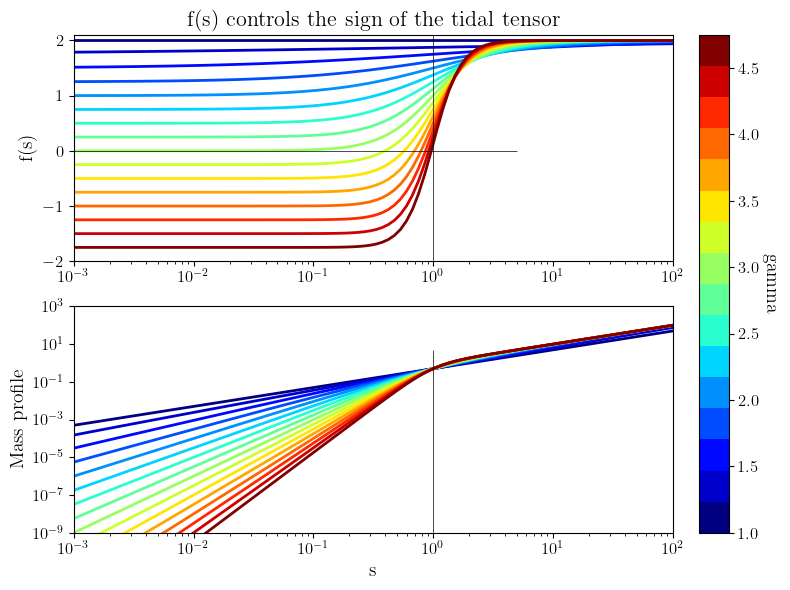

In [94]:
def f(s,gamma):
    numerator = 3 + 2*s**(gamma-1) - gamma
    denominator = 1 + s**(gamma-1)
    return numerator/denominator

def mass_profile(s,gamma):
    numerator = s**gamma
    denominator = 1 + s**(gamma-1)
    return numerator/denominator


s = np.logspace(-3, 2, 100)
gammas = np.arange(1., 5,0.25)
solutions = []
mass_profiles = []
for gamma in gammas:
    f_s = f(s, gamma)
    solutions.append(f_s)
    mass_profile_s = mass_profile(s, gamma)
    mass_profiles.append(mass_profile_s)

cmap = mpl.cm.get_cmap('jet', len(gammas))
norm=mpl.colors.Normalize(vmin=min(gammas), vmax=max(gammas))

fig=plt.figure(figsize=(8, 6))
gs=fig.add_gridspec(2, 2, width_ratios=[1, 0.05])
axes=[]
axes.append(fig.add_subplot(gs[0, 0]))
axes.append(fig.add_subplot(gs[1, 0]))
cax=fig.add_subplot(gs[:, 1])
for i, gamma in enumerate(gammas):
    color = cmap(i)
    axes[0].plot(s, solutions[i], label=f'gamma={gamma:.2f}', color=color)
sm=plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar=fig.colorbar(sm, cax=cax)
cbar.set_label('gamma', rotation=270, labelpad=15)
axes[0].vlines(1, -2, 2.1, color='black', lw=0.5)
axes[0].hlines(0, 0, 5, color='black', lw=0.5)
axes[0].set_xlim(0, 5)
axes[0].set_ylim(-2, 2.1)
axes[0].set_ylabel('f(s)')
for i, gamma in enumerate(gammas):
    color = cmap(i)
    axes[1].plot(s, mass_profiles[i], label=f'gamma={gamma:.2f}', color=color)
axes[1].vlines(1, 0, 5, color='black', lw=0.5)
axes[1].set_yscale('log')
axes[1].set_ylim(1e-9, 1e3)
axes[0].set_xlim(np.min(s), np.max(s))
axes[1].set_xlim(np.min(s), np.max(s))
axes[0].set_xscale('log')
axes[1].set_xscale('log')

axes[1].set_xlabel('s')
axes[0].set_title('f(s) controls the sign of the tidal tensor')
axes[1].set_ylabel('Mass profile')
fig.tight_layout()

An interesting note. 

$\gamma=3$ is a critical value for the value. If it is greater than 3, when are beneath the characteristic radius of the value, each shell 